<a href="https://colab.research.google.com/github/sampiecz/490_ASSN3/blob/master/ASSN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and dataset generation.

In [86]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
 
# D
num_observations = 10000
x1 = np.random.multivariate_normal([0,0], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x2 = np.random.multivariate_normal([3,3], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x3 = np.random.multivariate_normal([3,0], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x4 = np.random.multivariate_normal([0,3], [[0.1, 0.2], [0.2, 0.1]], num_observations)
features = np.vstack((x1, x2, x3, x4)).astype(np.float32)
labels = np.hstack((np.full(num_observations, 0), np.full(num_observations,1), np.full(2*num_observations, 2)))
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
 

 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  


Features and labels XOR data vis

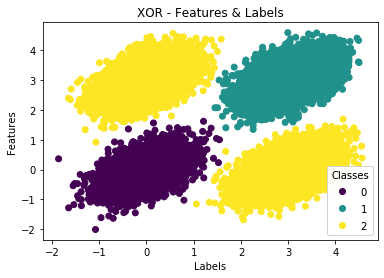

In [87]:
# XOR data vis.  
fig, ax = plt.subplots()
ax.set_ylabel("Features")
ax.set_xlabel("Labels")
scatter = ax.scatter(features[5000:, 0], features[5000:, 1], c=labels[5000:])
plt.title("XOR - Features & Labels")
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)

Training data visualization

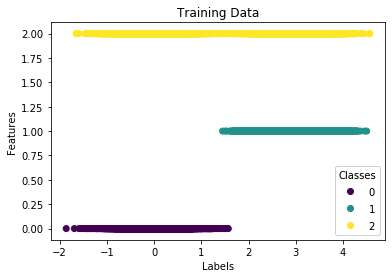

In [88]:

# Training data.
fig, ax = plt.subplots()
ax.set_ylabel("Features")
ax.set_xlabel("Labels")
scatter = ax.scatter(X_train[:,0], y_train, c=y_train)
plt.title("Training Data")
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)
plt.show()

Build model

In [0]:

feature_vector_shape = len(X_train[0])
input_shape = (feature_vector_shape,)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation="softmax")
])


Compile fit and evaluate

In [90]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test, verbose=2)

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 1s 52us/sample - loss: 0.9298 - acc: 0.7256
Epoch 2/5
26800/26800 [==============================] - 1s 47us/sample - loss: 0.1504 - acc: 0.9596
Epoch 3/5
26800/26800 [==============================] - 1s 47us/sample - loss: 0.0785 - acc: 0.9788
Epoch 4/5
26800/26800 [==============================] - 1s 48us/sample - loss: 0.0585 - acc: 0.9835
Epoch 5/5
26800/26800 [==============================] - 1s 50us/sample - loss: 0.0451 - acc: 0.9872
13200/13200 - 0s - loss: 0.0108 - acc: 0.9982


[0.01082293503550869, 0.9981818]

Plot Decision Boundary

In [92]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    _labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = _labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(features, labels, model)

ValueError: ignored